Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

Loading and splitting mnist data

In [ ]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Visualising handwritten images

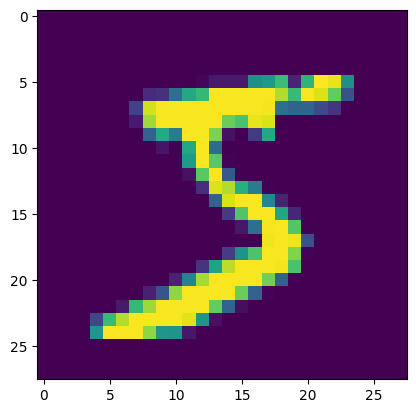

In [ ]:
plt.imshow(x_train[0])

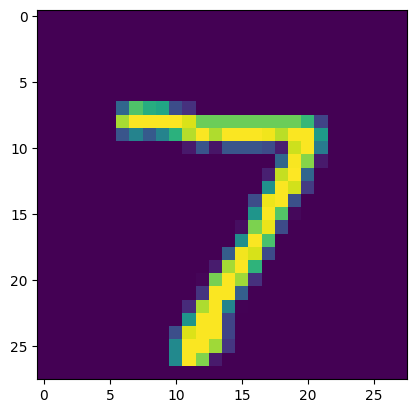

In [ ]:
plt.imshow(x_test[0])

reshaping the images

In [ ]:
x_train=x_train/225
x_test=x_test/225

In [ ]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Training the model

In [ ]:
model=Sequential()

adding neural network layers

In [ ]:
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer="Adam",loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=64,epochs=10,verbose=1,validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.3281 - accuracy: 0.9076 - val_loss: 0.1691 - val_accuracy: 0.9523
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.1480 - accuracy: 0.9574 - val_loss: 0.1266 - val_accuracy: 0.9635
Epoch 3/10
750/750 [==============================] - 4s 6ms/step - loss: 0.1055 - accuracy: 0.9695 - val_loss: 0.1096 - val_accuracy: 0.9682
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0789 - accuracy: 0.9770 - val_loss: 0.0971 - val_accuracy: 0.9707
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0619 - accuracy: 0.9826 - val_loss: 0.0868 - val_accuracy: 0.9744
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0497 - accuracy: 0.9857 - val_loss: 0.0914 - val_accuracy: 0.9722
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0390 - accuracy: 0.9893 - val_loss: 0.0883 - val_accuracy: 0.9749
Epoch 

evaluation metrics

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0818 - accuracy: 0.9756


[0.08176448941230774, 0.975600004196167]

In [ ]:
prediction=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step
